<a href="https://colab.research.google.com/github/dohyeon-kim012/MachineLearning-DeepLearning/blob/main/DeepLearning/06.%EC%86%90%EC%8B%A4%ED%95%A8%EC%88%98%20(SSE%2CCEE)%2C%20%EB%AF%B8%EB%8B%88%EB%B0%B0%EC%B9%98%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손실함수

## 지표

상황 판단을 내리기 위한 기준을 정량화한 것

-----

**머신러닝에서의 지표**
- `MSE`, `MAE`, `RMSE`
- 재현율, 정밀도, f1 score
- Accuracy

---

**신경망에서의 지표**  
: **손실함수**

- 대표적인 손실함수 : 오차제곱합 SSE , 교차 엔트로피 오차 CEE
- 머신러닝에서 사용하는 지표는 모두 사용
- 잘 맞춘 것을 지표로 삼을지 ( score / accuracy)
- **잘 못 맞춘 것을 지표로 삼을지 ( loss / cost )** 

--> 주로 잘 못 맞춘 것을 사용한다

---

**좋은 신경망이란**  

Loss가 적은 신경망 ( 잘 못 맞춘 것이 **낮은** 신경망 )

## 오차 제곱 합 ( sum of squares for error, SSE )

신경망에서의 SSE
$$
SSE = \frac{1}{2}\sum_k(y_k-t_k)^2
$$

인간이 신경망을 공부할 때 사용하는 공부용 SSE 입니다..

* $y_k$ : 신경망의 예측값
* $t_k$ : 정답 레이블
* $k$ : 출력층의 뉴런 개수
  * `강아지, 고양이, 말을 예측 하면` $k$는 3 - `클래스는 [0, 1, 2]`
  * MNIST 손글씨 데이터 셋이면 $k$는 10 - `클래스는 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`

----------
* 보통 신경망에서는 `SSE`를 잘 쓰지 않고 `Cross Entropy Error`를 활용
  * `SSE`는 신경망으로 회귀를 할 때 많이 사용
* `SSE`를 배우는 이유는 말 그대로 `loss`에 대한 이해를 하기 위함
* `SSE`는 신경망을 우리가 공부 할 때 개념을 익히는 데에 좋다. ( 실무에서는 사용 잘 안한다. )
* 정상적인 $\frac{1}{n}$을 사용하지 않고 $\frac{1}{2}$을 사용한 이유는
  * `SSE`를 미분 했을 때 남는게 순수한 오차라고 할 수 있는 $(y-t)$만 남기 때문에

In [ ]:
import numpy as np

y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]) # 2번 클래스로의 예측 확률이 60%
t = np.array([0,      0,   1,   0,    0,   0,   0,   0,   0,   0]) # 정답은 2라는 이야기 이다. 클래스의 개수만큼 One Hot Encoding이 되어있는 상태

In [ ]:
# 각 클래스별 순수한 오차
y - t

array([ 0.1 ,  0.05, -0.4 ,  0.  ,  0.05,  0.1 ,  0.  ,  0.1 ,  0.  ,
        0.  ])

In [ ]:
# SSE를 사용해서 손실값(Loss값)확인
def sum_squared_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [ ]:
print("정답을 2로 추정했을 때의 SSE값(0.6) : {:.3f}".format(sum_squared_error(y, t)))

정답을 2로 추정했을 때의 SSE값(0.6) : 0.098


In [ ]:
y = np.array([0.1, 0.05, 0.8, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]) # 2번 클래스로의 예측 확률이 80%
print("정답을 2로 추정했을 때의 SSE값(0.8) : {:.3f}".format(sum_squared_error(y, t)))

정답을 2로 추정했을 때의 SSE값(0.8) : 0.027


정답을 더 잘 추정하게 되었기 때문에 ( 확률이 60%에서 80%로 높아졌기 때문에 ) loss값인 MSE 값은 낮아져야 함

In [ ]:
y = np.array([0.7, 0.05, 0.1 , 0.0, 0.05, 0.0, 0.0, 0.1, 0.0, 0.0]) # 2번 클래스로의 예측 확률이 10%
print("정답을 2로 추정했을 때의 SSE값(0.1) : {:.3f}".format(sum_squared_error(y, t)))

정답을 2로 추정했을 때의 SSE값(0.1) : 0.657


## 교차 엔트로피 오차( Cross Entropy Error )

SSE가 결과값의 변화가 그리 크지 않은 반면,  
**CEE는 결과값의 변화가 크기** 때문에 실무에서는 더 많이 사용된다  
---> $y_k$에 log를 씌웠기 때문 -> 예측이 맞을 때는 더 적은 패널티, 틀렸을 때는 더 큰 패널티 부여 가능해짐

$$
CEE = -\sum_{k}t_k\log{y_k}
$$

* $y_k$ : 신경망의 예측값
* $t_k$ : 정답 레이블
* $k$ : 출력층의 뉴런 개수 = 클래스의 개수
* $k$번째 출력 = 클래스 번호 0, 1, 2 ...

* $t_k$는 `One Hot Encoding` 거치는 것이 좋음
* 정답 레이블의 소프트맥스의 결과가 0.6이면 $-\log{0.6}$을 구한것과 똑같다  
    ---> 소프트맥스는 $y_k$ 값을 구하는 함수

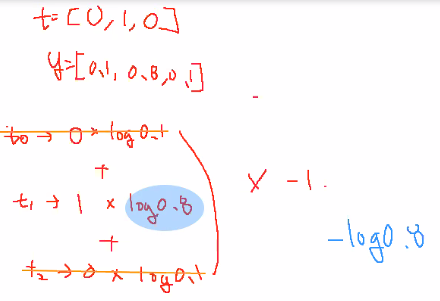

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7 # 0.0000001
    return -np.sum(t * np.log(y + delta))

`np.log` 함수에 0이 대입되면 음수 무한대가 되어 버림  
따라서 아주 작은 값인 `delta`를 더해주어 방지한다

In [ ]:
t = np.array([0, 0, 1,   0,    0,   0,   0,   0,   0,   0]) # 정답은 2

y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]) # 2번 클래스로의 예측 확률이 60%
print("정답을 2로 추정했을 때의 CEE값(0.6) : {:.3f}".format(cross_entropy_error(y, t)))

y = np.array([0.1, 0.05, 0.8, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0]) # 2번 클래스로의 예측 확률이 80%
print("정답을 2로 추정했을 때의 CEE값(0.8) : {:.3f}".format(cross_entropy_error(y, t)))

y = np.array([0.7, 0.05, 0.1 , 0.0, 0.05, 0.0, 0.0, 0.1, 0.0, 0.0]) # 2번 클래스로의 예측 확률이 10%
print("정답을 2로 추정했을 때의 CEE값(0.1) : {:.3f}".format(cross_entropy_error(y, t)))

정답을 2로 추정했을 때의 CEE값(0.6) : 0.511
정답을 2로 추정했을 때의 CEE값(0.8) : 0.223
정답을 2로 추정했을 때의 CEE값(0.1) : 2.303


# 배치  

**데이터의 묶음**  

묶음대로 결과물이 계산된다
- ex) 100개의 데이터를 한번에 묶어서 (배치를 만들어서) 입력을 했으면, 그에 대한 결과물도 100개가 한번에 나온다  

* 배치를 적용한 Loss의 수식은?
  * `N`이면 `N`건에 대한 `CEE` 값을 구한 다음( 각각이라곤 했지만 한꺼번에 구해진다 )
  * 그 값들을 모두 더하고 `N`으로 나눠 `N`에 대한 평균을 구한다.

---

**배치를 적용한 CEE**
$$
CEE = -\frac{1}{N}\sum_n\;\sum_{k}t_{nk}\log{y_{nk}}
$$


## 미니배치란?
  * `MNIST`의 데이터의 개수는 60,000건
  * 신경망이 `MNIST`를 학습 하고, 거기에 대한 평가를 내릴 때 60,000건 모두에 대한 손실 함수의 합을 구해야 할까?
  * 데이터의 양이 굉장히 많은 경우에는 모든 데이터를 다 쓰는 것이 아니고, **데이터의 일부를 랜덤하게 추려서** 근사치로 이용할 수 있다.
  * 이 일부가 되는 데이터를 **미니배치**라고 한다.

--> 미니배치를 바꿔서 랜덤성을 높여 여러 번의 훈련을 할 수 있음

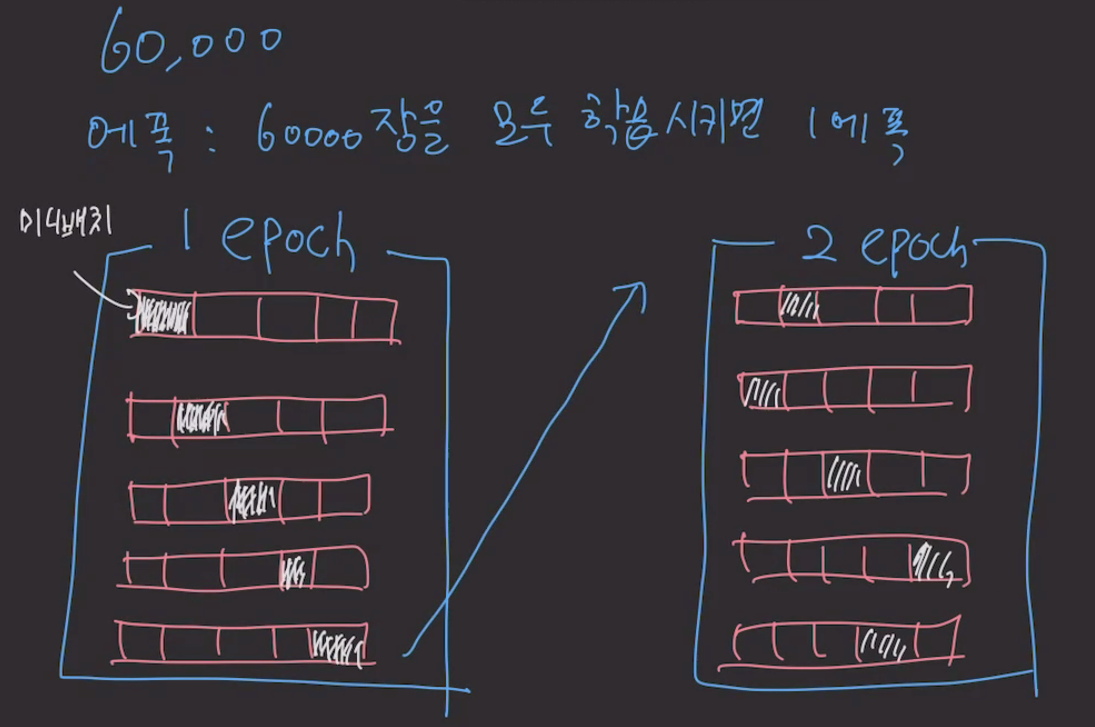

### mnist 데이터셋으로 실습

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# mnist 데이터셋 로딩
from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
TRAIN_IMAGE_SIZE = X_train.shape[0]

X_train = X_train.reshape(TRAIN_IMAGE_SIZE, -1)
X_train.shape, y_train.shape

((60000, 784), (60000,))

### y_train 원핫인코딩하기

In [ ]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

`y_train`이 One Hot Encoding이 되어있지 않은 상태  
따라서 다음과 같은 흐름을 먼저 이해해야 함  

* step 1 : 배열의 shape 확인
```python
  [5, 0, 4]
```
* step 2 : 열 배열의 형태로 reshape
```python
  [[5],
   [0],
   [4]]
```
* step 3 : onehot encoding 진행
```python
 [[0,0,0,0,0,1,0,0,0,0],
   [1,0,0,0,0,0,0,0,0,0],
   [0,0,0,0,1,0,0,0,0,0]]
```

In [ ]:
# y_train one-hot encoding

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()

y_train_reshaped = y_train.reshape(60000, -1)

# reshape된 y_train을 onehotencoder에 fit_transform 하기
y_train_onehot = onehot_encoder.fit_transform(y_train_reshaped)

In [ ]:
# 변환된 y_train을 toarray() 메소드를 통해 압축 풀어주기 
y_train_toarray = y_train_onehot.toarray()
y_train_toarray.shape

(60000, 10)

In [ ]:
y_train_toarray[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

## 미니배치 구현하기

In [ ]:
import numpy as np

# 훈련 데이터 전체에서 무작위로 10장만 빼오기
train_size = X_train.shape[0]  # 전체 훈련 데이터 세트의 크기 = 60000
batch_size = 10 # 미니 배치의 사이즈

# train_size에서 batch_size (10개) 만큼 점수를 무작위로 선택
batch_mask = np.random.choice(train_size, batch_size)

batch_mask

array([56648, 56457,  6216, 10395,  4181, 19055, 58800, 33574, 16795,
       47314])

In [ ]:
batch_mask.shape

(10,)

In [ ]:
X_batch = X_train[batch_mask]
t_batch = y_train_toarray[batch_mask]

X_batch.shape, t_batch.shape
# X_batch와 t_batch 둘 다 데이터의 개수를 batch_mask와 똑같이 만들어줌

((10, 784), (10, 10))

In [ ]:
t_batch

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

### 배치를 적용한 CEE 구현하기

$$
CEE = -\frac{1}{N}\sum_n\;\sum_{k}t_{nk}\log{y_{nk}}
$$

* $y_k$ : 신경망의 예측값
* $t_k$ : 정답 레이블
* $k$ : 출력층의 뉴런 개수
* $n$ : 배치 사이즈

In [ ]:
# ver 1 -> t가 원핫인코딩이 되어 있는 형태
def cross_entropy_error_v1(y, t):
    delta = 1e-6

    # 배치를 사용하지 않은 경우
    if y.ndim == 1:
        # batch_size를 reshape을 통해 강제로 1로 지정
        t = t.reshape(1, -1)
        y = y.reshape(1, -1)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y+delta)) / batch_size
    # t가 원핫인코딩이 되어 있는 상태이므로 batch_size의 sum을 구하는 것은 의미가 없다

In [ ]:
# ver 2 -> t가 원핫인코딩이 안 된 상태
def cross_entropy_error_v2(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size) # size를 이용해 데이터의 수 만큼 지정해 줄 수 있음 
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

**타인의 코드를 볼 때 요령**

**변수를 보기**
  
y는 예측값, t는 타깃(정답) 이므로 둘은 같은 데이터의 수를 가진다  
batch_size가 y.shape[0]이므로 len(t)도 batch_size와 똑같은 값을 가진다 

```python
np.log(y[np.arange(batch_size), t])

제일 안쪽에 있는 변수
batch_size : 5
t : [2, 7, 0, 9, 8]

batch_size를 이용하는 np.arange

np.arange(batch_size) : [0, 1, 2, 3, 4]

y[np.arange(batch_size), t]

y[[0,1,2,3,4],[2,7,0,9,8]]는

y[0, 2]
y[1, 7]
y[2, 0]
y[3, 9]
y[4, 8]

로 표현된다.

y는 5개의 배치 데이터에 대한 소프트맥스의 결과물

y = [[0.0, 0.1, 0.7, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0],
     [0.0, 0.1, 0.7, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0],
     [0.0, 0.1, 0.7, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0],
     [0.0, 0.1, 0.7, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0],
     [0.0, 0.1, 0.7, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0]]

np.log(y[np.arange(batch_size), t])

0번째의 경우
np.log(y[0, 2])
np.log(0.7)

```

In [ ]:
y = np.array([[0.0, 0.1, 0.7, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0],
     [0.0, 0.1, 0.7, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0],
     [0.0, 0.1, 0.7, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0],
     [0.0, 0.1, 0.7, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0],
     [0.0, 0.1, 0.7, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0]])

batch_size = 5
t = [2,7,0,9,8]
y_arr = np.arange(batch_size) # [0,1,2,3,4]

y[y_arr[4], t[4]] # y[0, 2]

0.7

In [ ]:
y.shape[0] # batch_size = 10

10

In [ ]:
t = np.array([0, 1, 2])
t.size

3